In [9]:
import os
import numpy as np

AAU=[]
NN=[]

print(os.listdir())
obj_type="gs"
file=f"../final_results/Optim_results_{obj_type}/results_summary_{obj_type}.txt"
setting = file.split('_')[-1].split('.')[0].upper()
if setting == "GW":
    setting="LGW"
print(setting)
with open(file, 'r') as f:
    data = f.readlines()
for line in data:
    if "NN" in line:
        NN.append(line)
for line in data:
    if "AAU" in line:
        AAU.append(line)
AAU = [elem.strip().replace('\\\\', '').split(' & ') for elem in AAU]
aau_cost=[elem[2] for elem in AAU]
NN = [elem.strip().replace('\\\\', '').split(' & ') for elem in NN]
NN_cost=[elem[2] for elem in NN]
aau_buffer=[elem[3] for elem in AAU]
NN_buffer=[elem[3] for elem in NN]
aau_dl=[elem[4] for elem in AAU]
NN_dl=[elem[4] for elem in NN]
print(aau_buffer)
print(NN_buffer)

['view_results_raw.ipynb', 'data_formatting.ipynb', 'Optim_obj_plot.ipynb', 'buffer_overflow.ipynb', 'cost_eval.ipynb']
GS
['43.25GB', '25.35GB', '39.67GB', '-6.87GB']
['-12.09GB', '-12.09GB', '-12.09GB', '-12.09GB']


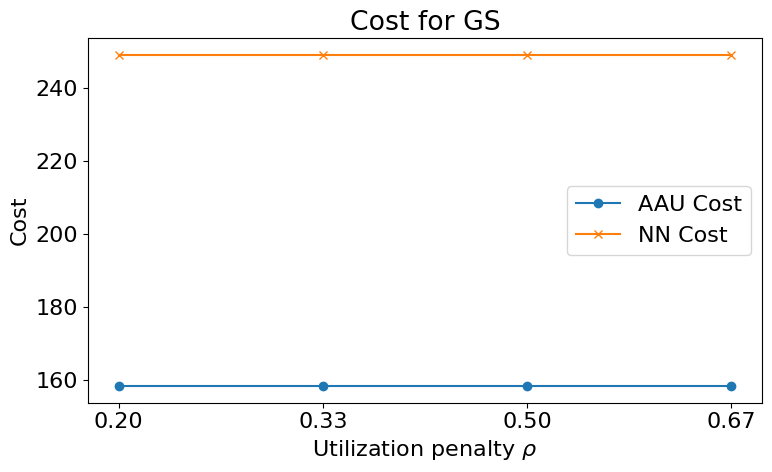

In [10]:
import matplotlib.pyplot as plt

x_labels = [elem[0] for elem in AAU]  # ['0.20', '0.33', '0.50', '0.67']

# Convert buffer values to float (strip 'GB ' and convert)
aau_buffer_float = [float(val.replace('GB', '').strip()) for val in aau_buffer]
nn_buffer_float = [float(val.replace('GB', '').strip()) for val in NN_buffer]

# Convert cost values to float
aau_cost_float = [float(val) for val in aau_cost]
nn_cost_float = [float(val) for val in NN_cost]

fig, ax1 = plt.subplots(figsize=(8, 5))

plt.xlabel(r'Utilization penalty $\rho$')
plt.rcParams.update({'font.size': 16})
plt.ylabel('Cost')
plt.plot(x_labels, np.array(aau_cost_float), marker='o', color='tab:blue', label='AAU Cost')
plt.plot(x_labels, np.array(nn_cost_float), marker='x', color='tab:orange', label='NN Cost')
plt.legend()
if setting == "LGW":
    plt.title(f'Cost for GS and {setting}')
else:
    plt.title(f"Cost for {setting}")
plt.tight_layout()
extra_folder="../../figs/"
plt.savefig(f"{extra_folder}Buffer_cost_{setting}.pdf", format="pdf", bbox_inches="tight")
plt.show()

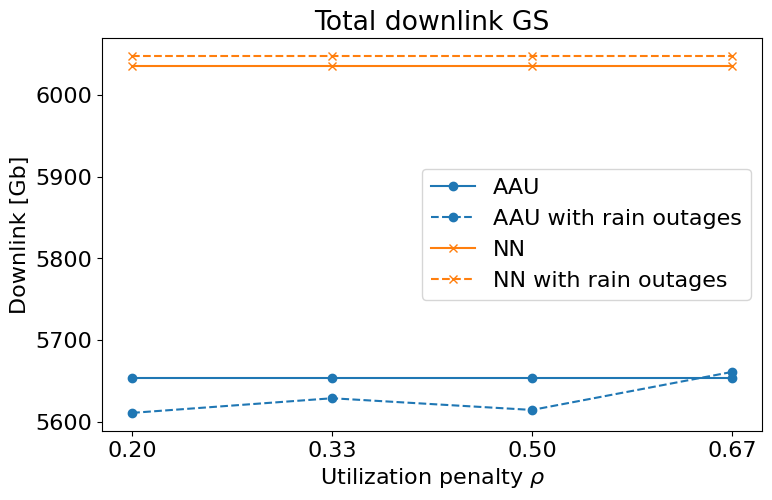

In [11]:
# Convert dl values to float
aau_dl_float = [float(val.strip()) for val in aau_dl]
nn_dl_float = [float(val.strip()) for val in NN_dl]
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8, 5))
plt.plot(x_labels, aau_dl_float, marker='o', label='AAU', color='tab:blue')
plt.plot(x_labels, np.array(aau_dl_float)-np.array(aau_buffer_float), marker='o', label='AAU with rain outages', color='tab:blue', linestyle="--")
plt.plot(x_labels, nn_dl_float, marker='x', label='NN', color='tab:orange')
plt.plot(x_labels, np.array(nn_dl_float)-np.array(nn_buffer_float), marker='x', label='NN with rain outages', color='tab:orange', linestyle="--")


plt.xlabel(r'Utilization penalty $\rho$')
plt.ylabel('Downlink [Gb]')
plt.legend()
plt.tight_layout()
# extra_folder="../figs/"
plt.ticklabel_format(axis='y', style='plain')  # Prevent scientific notation on y-axis
if setting == "LGW":
    plt.title(f'Total downlink GS and {setting}')
else:
    plt.title(f"Total downlink {setting}")

plt.savefig(f"{extra_folder}total_DL_{setting}.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [12]:
def read_reults(file):
    AAU=[]
    NN=[]
    setting = file.split('_')[-1].split('.')[0].upper()
    if setting == "GW":
        setting="LGW"
    with open(file, 'r') as f:
        data = f.readlines()
    for line in data:
        if "NN" in line:
            NN.append(line)
    for line in data:
        if "AAU" in line:
            AAU.append(line)
    AAU = [elem.strip().replace('\\\\', '').split(' & ') for elem in AAU]
    aau_cost=[elem[2] for elem in AAU]
    NN = [elem.strip().replace('\\\\', '').split(' & ') for elem in NN]
    NN_cost=[elem[2] for elem in NN]
    aau_cost = [float(val) for val in aau_cost]
    NN_cost = [float(val) for val in NN_cost]
    aau_buffer=[elem[3] for elem in AAU]
    aau_buffer_float = [float(val.replace('GB', '').strip()) for val in aau_buffer]
    NN_buffer=[elem[3] for elem in NN]
    NN_buffer_float = [float(val.replace('GB', '').strip()) for val in NN_buffer]
    aau_dl=[elem[4] for elem in AAU]
    NN_dl=[elem[4] for elem in NN]
    aau_dl = [float(val) for val in aau_dl]
    NN_dl = [float(val) for val in NN_dl]
    return aau_cost, aau_buffer_float, aau_dl, NN_cost, NN_buffer_float, NN_dl
rho=[0.2, 1/3, 0.5, 2/3]
NN_raw=[249, 5999.4, 6032.3]
NN_raw[1]=NN_raw[2]-NN_raw[1]
AAU_raw=[128.6, 5252.8, 5653.8]
AAU_raw[1]=AAU_raw[2]-AAU_raw[1]

[6080.33, 6080.33, 6080.33, 6080.33]


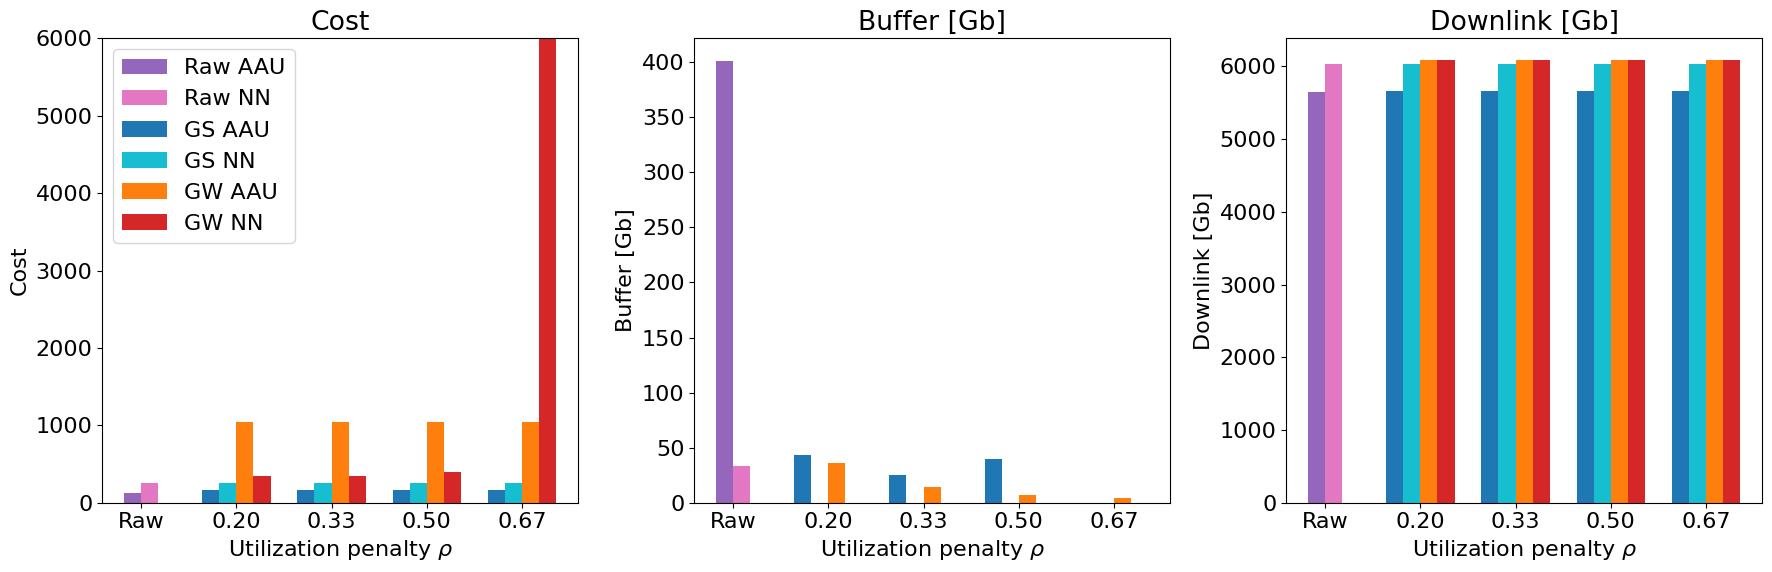

In [13]:

obj_type="gs"
file=f"../final_results/Optim_results_{obj_type}/results_summary_{obj_type}.txt"
# file="../figs/results_summary_gs.txt"
gs_aau_cost, gs_aau_buffer, gs_aau_dl, gs_NN_cost, gs_NN_buffer, gs_NN_dl=read_reults(file)

obj_type="gw"
file=f"../final_results/Optim_results_{obj_type}/results_summary_{obj_type}.txt"
# file="../figs/results_summary_gw.txt"
gw_aau_cost, gw_aau_buffer, gw_aau_dl, gw_NN_cost, gw_NN_buffer, gw_NN_dl=read_reults(file)

print(gw_aau_dl)
bar_width = 0.18
x = np.arange(len(rho) + 1)  # Add one for the raw results at position 0
labels = ["Raw"] + [f"{r:.2f}" for r in rho]
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Cost
axs[0].bar(0 - bar_width*0.5, AAU_raw[0], width=bar_width, label='Raw AAU', color='tab:purple')
axs[0].bar(0 + bar_width*0.5, NN_raw[0], width=bar_width, label='Raw NN', color='tab:pink')
axs[0].bar(x[1:] - bar_width*1.5, gs_aau_cost, width=bar_width, label='GS AAU', color='tab:blue')
axs[0].bar(x[1:] - bar_width*0.5, gs_NN_cost, width=bar_width, label='GS NN', color='tab:cyan')
axs[0].bar(x[1:] + bar_width*0.5, gw_aau_cost, width=bar_width, label='GW AAU', color='tab:orange')
axs[0].bar(x[1:] + bar_width*1.5, gw_NN_cost, width=bar_width, label='GW NN', color='tab:red')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].set_title('Cost')
axs[0].set_xlabel(r'Utilization penalty $\rho$')
axs[0].set_ylabel('Cost')
axs[0].set_ylim(0, 6000)
axs[0].legend()

# Buffer
axs[1].bar(0 - bar_width*0.5, AAU_raw[1], width=bar_width, label='Raw AAU', color='tab:purple')
axs[1].bar(0 + bar_width*0.5, NN_raw[1], width=bar_width, label='Raw NN', color='tab:pink')
axs[1].bar(x[1:] - bar_width*1.5, gs_aau_buffer, width=bar_width, label='GS AAU', color='tab:blue')
axs[1].bar(x[1:] - bar_width*0.5, gs_NN_buffer, width=bar_width, label='GS NN', color='tab:cyan')
axs[1].bar(x[1:] + bar_width*0.5, gw_aau_buffer, width=bar_width, label='GW AAU', color='tab:orange')
axs[1].bar(x[1:] + bar_width*1.5, gw_NN_buffer, width=bar_width, label='GW NN', color='tab:red')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].set_title('Buffer [Gb]')
axs[1].set_xlabel(r'Utilization penalty $\rho$')
axs[1].set_ylim(0)
axs[1].set_ylabel('Buffer [Gb]')

# Downlink
axs[2].bar(0 - bar_width*0.5, AAU_raw[2], width=bar_width, label='Raw AAU', color='tab:purple')
axs[2].bar(0 + bar_width*0.5, NN_raw[2], width=bar_width, label='Raw NN', color='tab:pink')
axs[2].bar(x[1:] - bar_width*1.5, gs_aau_dl, width=bar_width, label='GS AAU', color='tab:blue')
axs[2].bar(x[1:] - bar_width*0.5, gs_NN_dl, width=bar_width, label='GS NN', color='tab:cyan')
axs[2].bar(x[1:] + bar_width*0.5, gw_aau_dl, width=bar_width, label='GW AAU', color='tab:orange')
axs[2].bar(x[1:] + bar_width*1.5, gw_NN_dl, width=bar_width, label='GW NN', color='tab:red')
axs[2].set_xticks(x)
axs[2].set_xticklabels(labels)
axs[2].set_title('Downlink [Gb]')
axs[2].set_xlabel(r'Utilization penalty $\rho$')
axs[2].set_ylabel('Downlink [Gb]')
# axs[2].legend()

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../figs/bar_plot_cost.pdf'

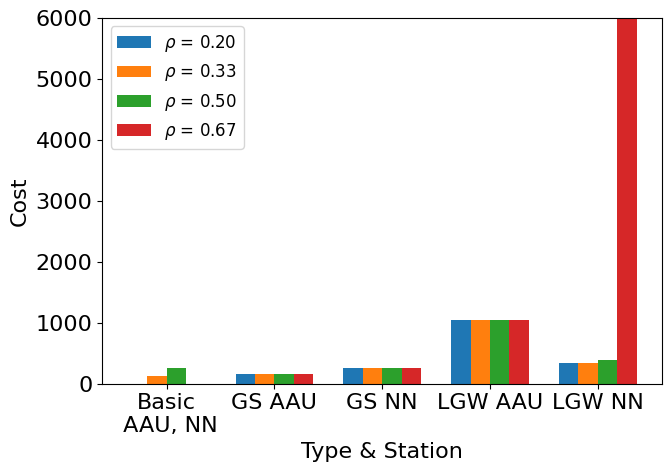

In [14]:
import matplotlib.pyplot as plt
num_rho=4
# Prepare data for grouped bar plot: each group is (type, station), each bar is a rho value
group_labels = [
    'Basic\n AAU, NN',
    'GS AAU', 'GS NN',
    'LGW AAU', 'LGW NN'
]
num_groups = len(group_labels)
# Each row: [rho1, rho2, rho3, rho4]
cost_data = [
    [0,AAU_raw[0], NN_raw[0],0], # * num_rho,  # Raw AAU cost (repeat for each rho for alignment)
    # [NN_raw[0]] * num_rho,   # Raw NN cost
    gs_aau_cost,
    gs_NN_cost,
    gw_aau_cost,
    gw_NN_cost
]
buffer_data = [
    # [AAU_raw[1]] * num_rho,  # Raw AAU buffer
    # [NN_raw[1]] * num_rho,   # Raw NN buffer
    [0,AAU_raw[1], NN_raw[1],0],
    gs_aau_buffer,
    gs_NN_buffer,
    gw_aau_buffer,
    gw_NN_buffer
]
dl_data = [
    # [AAU_raw[2]] * num_rho,  # Raw AAU DL
    # [NN_raw[2]] * num_rho,   # Raw NN DL
    [0,AAU_raw[2], NN_raw[2],0],
    gs_aau_dl,
    gs_NN_dl,
    gw_aau_dl,
    gw_NN_dl
]

# Plot 1: Cost
fig1, ax1 = plt.subplots(figsize=(7, 5))
for i in range(num_rho):
    ax1.bar(x + (i - num_rho/2 + 0.5)*bar_width, [cost_data[g][i] for g in range(num_groups)],
            width=bar_width, label=rf"$\rho$ = {rho[i]:.2f}")
ax1.set_xticks(x)
ax1.set_xticklabels(group_labels)
# ax1.set_title('Cost')
ax1.set_xlabel('Type & Station')
ax1.set_ylabel('Cost')
ax1.legend(fontsize=12)
ax1.set_ylim(0,6000)
plt.tight_layout()
plt.savefig("../figs/bar_plot_cost.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Plot 2: DL lost due to rain outages [Gb]
fig2, ax2 = plt.subplots(figsize=(7, 5))
for i in range(num_rho):
    ax2.bar(x + (i - num_rho/2 + 0.5)*bar_width, [buffer_data[g][i] for g in range(num_groups)],
            width=bar_width, label=rf"$\rho$ = {rho[i]:.2f}")
ax2.set_xticks(x)
ax2.set_xticklabels(group_labels)
# ax2.set_title('DL lost due to rain outages [Gb]')
ax2.set_xlabel('Type & Station')
ax2.set_ylabel('DL lost due to rain outages [Gb]')
ax2.legend(fontsize=12)
ax2.set_ylim(0)
plt.tight_layout()
plt.savefig("../figs/bar_plot_buffer.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Plot 3: Downlink [Gb]
fig3, ax3 = plt.subplots(figsize=(7, 5))
for i in range(num_rho):
    ax3.bar(x + (i - num_rho/2 + 0.5)*bar_width, [dl_data[g][i] for g in range(num_groups)],
            width=bar_width, label=rf"$\rho$ = {rho[i]:.2f}")
ax3.set_xticks(x)
ax3.set_xticklabels(group_labels)
# ax3.set_title('Downlink [Gb]')
ax3.set_xlabel('Type & Station')
ax3.set_ylabel('Downlink [Gb]')
ax3.set_ylim([5500, 6200])
ax3.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.savefig("../figs/bar_plot_dl.pdf", format="pdf", bbox_inches="tight")
plt.show()